## Property Assessment from Scrapped data

### Steps undertaken 

- data Aquisition
    - scrap
- Prepare
    - clean, 
    - segment, 
    - dropna   
- Concatenate all df
- do assesments
- handle outliers
- visualize


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

## Data Aquisition

** Load data and concatenate **

In [145]:

df1 = pd.read_csv('prop_1.csv')
df2 =  pd.read_csv('prop_2.csv')
df3 =  pd.read_csv('prop_3.csv')

df = pd.concat([df1,df2,df3])
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head()

,desc,location,size,value
0,5 Bedroom Tonwhouse Corner House in Lavington,"MASADUKU LINE, Lavington, Nairobi, Nairobi",14.0,52000000.0
1,Ambassadorial Palace in Spring Valley,"peponi road, Spring Valley, Nairobi, Nairobi",11.0,280000000.0
2,Spring Valley Ambassadorial Palace,"Spring Valley, Nairobi, Nairobi",11.0,290000000.0
3,10 Bedroom House in Karen- 3KE1375839,"Hardy, Karen, Nairobi, Nairobi",10.0,150000000.0
4,10 Bedroom House For Sale In Karen (Kenya) - 3...,"Karen, Nairobi, Nairobi",10.0,150000000.0


In [78]:
len(df)

3371

In [79]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3371 entries, 0 to 519
Data columns (total 4 columns):
desc        3362 non-null object
location    3299 non-null object
size        3360 non-null float64
value       3349 non-null float64
dtypes: float64(2), object(2)
memory usage: 131.7+ KB


In [80]:
# df['size'] = pd.to_numeric(df['size'])
# df = df.fillna(0)

# # df['value(Million)'] = df['value'].apply(lambda x: x/1000000)
# df.head()

### Explore the data

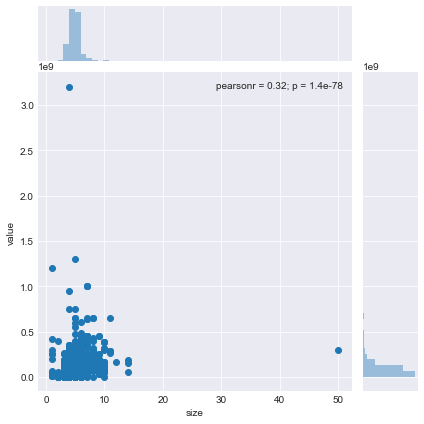

In [82]:
sns.jointplot(x=df['size'],y='value',data=df)

### Drop Outliers

- 50 bedroom house
- 4 bedroomed house valued at Ksh 3200000000 - (3.2B)

In [83]:
df[df['size']==50]

,desc,location,size,value
0,Two houses on 3/4 acre each 25 bedrooms on thi...,"Gigiri road , Gigiri, Nairobi",50.0,300000000.0


In [84]:
df.drop(0,inplace=True)

In [85]:
df[df['value']==3200000000.0]

,desc,location,size,value
1065,4 bedrooms all ensuite in 3. 6 acres prime land,"Lower Kabete Kitisuru, Spring Valley, Nairobi",4.0,3.200000e+09


In [86]:
df.drop(1065,inplace=True)

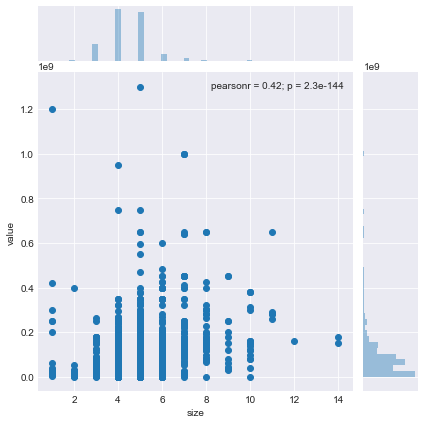

In [87]:
sns.jointplot(x=df['size'],y='value',data=df)

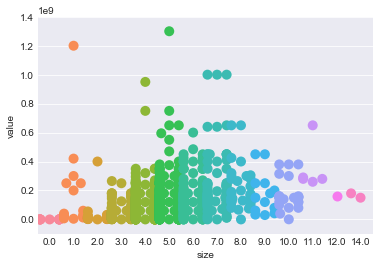

In [61]:
sns.swarmplot(x='size',y='value',data=df,size=10)

## House sizes on Market


Text(0.5,0,'No.of Bedrooms')

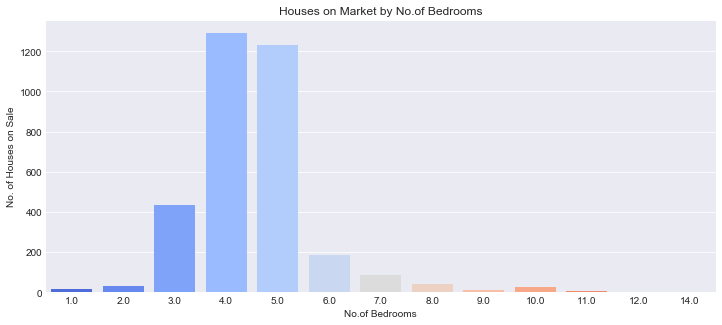

In [137]:
top_size = df['size'].value_counts().head(5)

plt.figure(figsize=(12,5))
sns.countplot(x='size', data= df, palette='coolwarm',saturation=1)
plt.title('Houses on Market by No.of Bedrooms')
plt.ylabel('No. of Houses on Sale')
plt.xlabel('No.of Bedrooms')


## Houses On Sale by Location

Text(0.5,0,'Location')

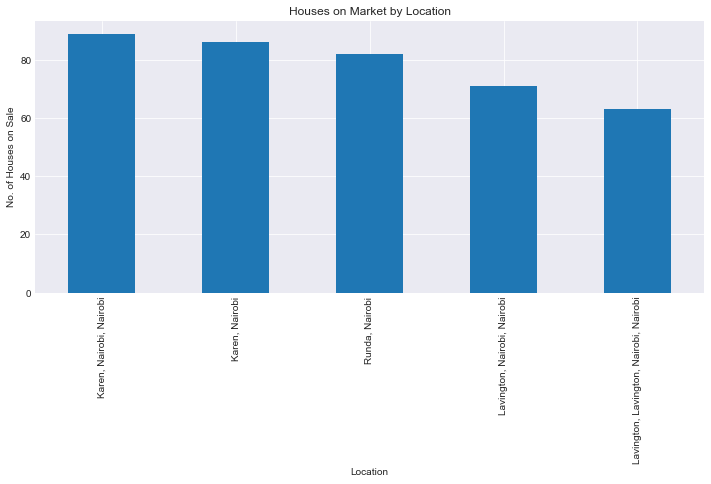

In [143]:
top_loc = df['location'].value_counts().head(5)

plt.figure(figsize=(12,5))
top_loc.plot(kind='bar')
plt.title('Houses on Market by Location')
plt.ylabel('No. of Houses on Sale')
plt.xlabel('Location')



In [2]:
df['location'].value_counts()

NameError: name 'df' is not defined

In [90]:
# df.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')